In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path=r"C:\Users\yaris\DS\dataset\census_income.csv"
df=pd.read_csv(path)

In [5]:
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.duplicated().sum()

24

In [8]:
for x in df.columns:
    p=df[x].value_counts()
    print(p)

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51


In [9]:
num_columns=df.select_dtypes(include="int64").columns.to_list()

In [10]:
num_columns

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [11]:
cat_columns=df.select_dtypes(include="object").columns.to_list()

In [12]:
cat_columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

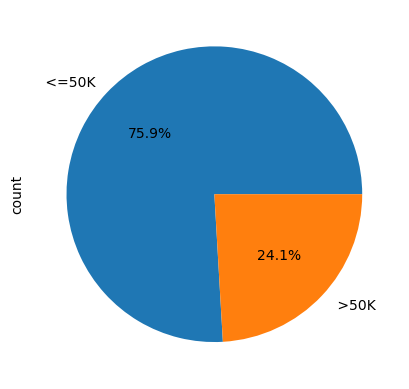

In [76]:
df["Income"].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.show()

inbalance data

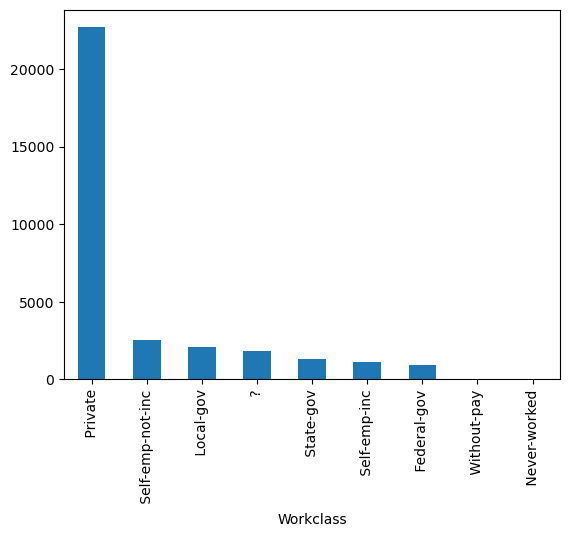

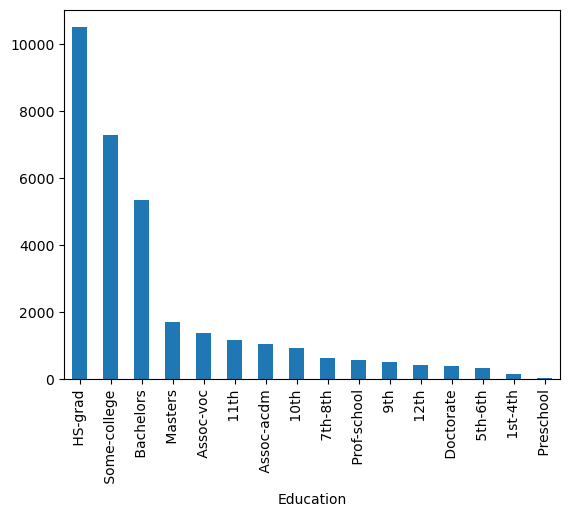

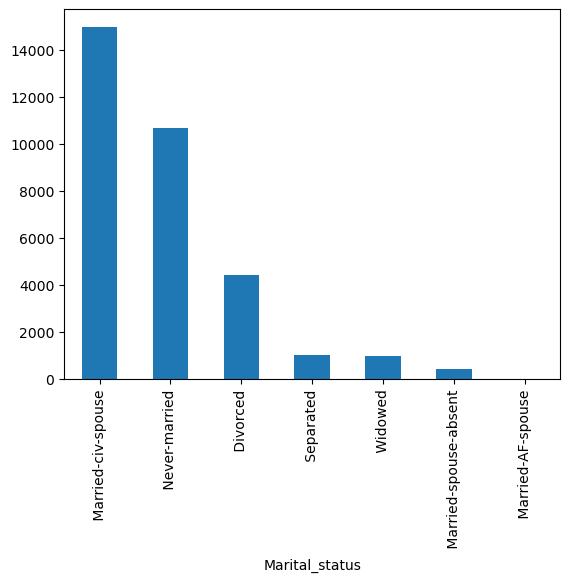

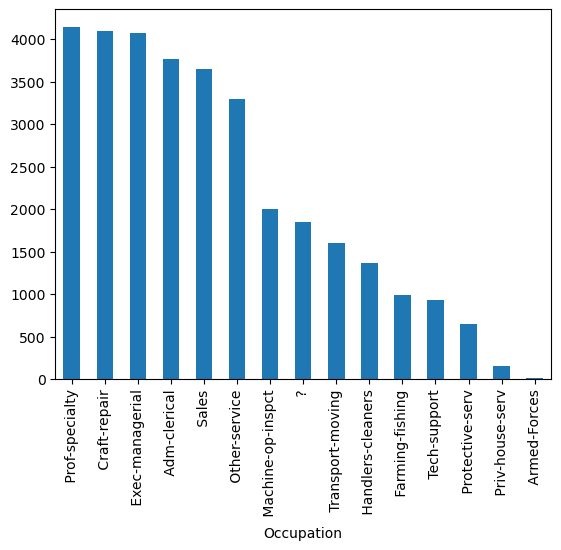

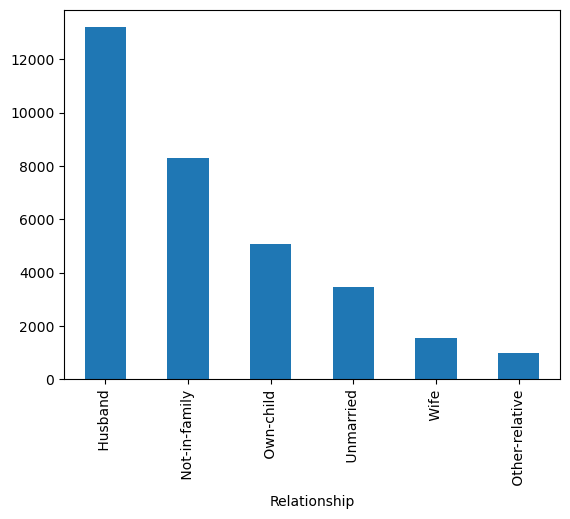

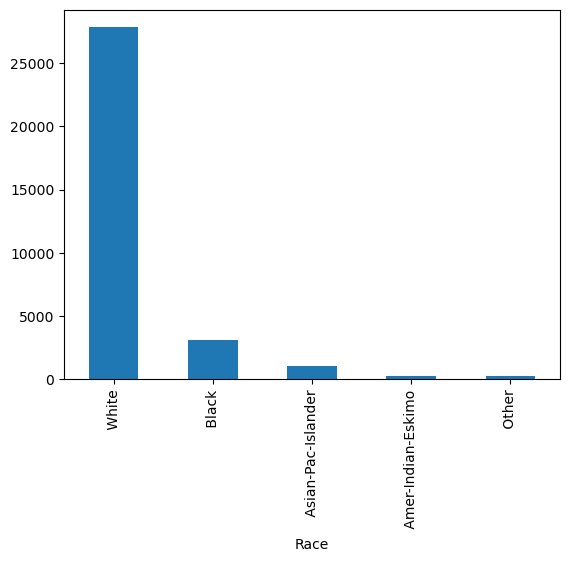

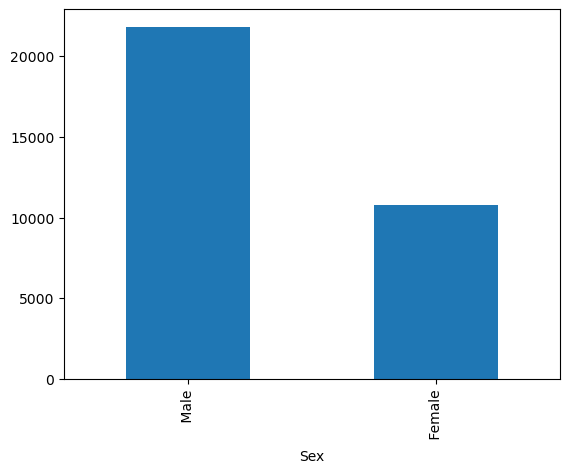

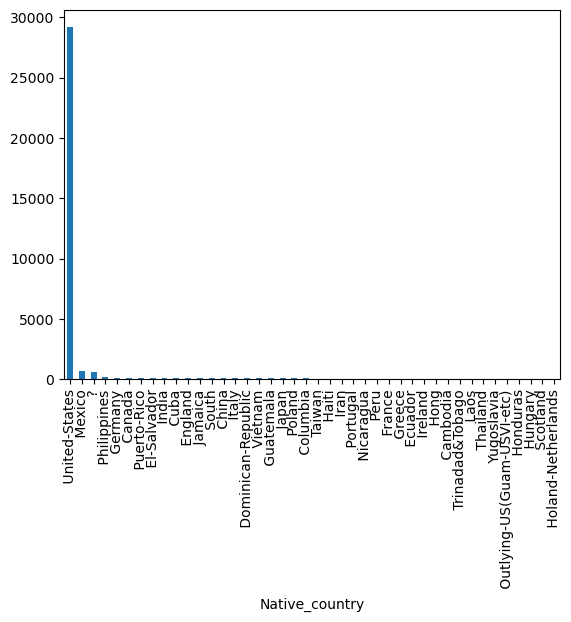

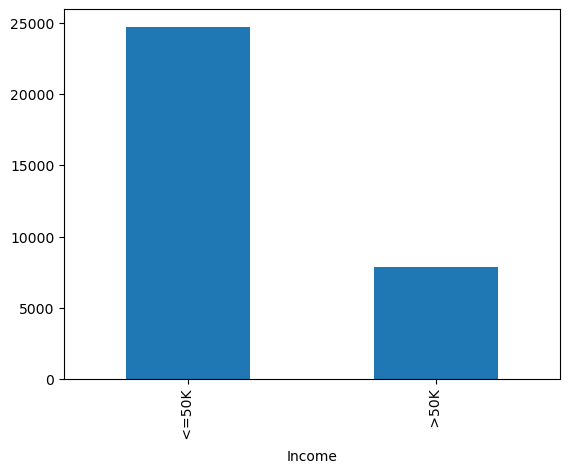

In [14]:
for x in cat_columns:
    df[x].value_counts().plot(kind="bar")

    plt.show()

In [15]:
df["Native_country"].value_counts()

Native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [16]:
val_count=df["Native_country"].value_counts()
df["Native_country"]=df["Native_country"].apply(lambda x: x if val_count[x]>= 100 else 'other')

In [17]:
df["Native_country"].value_counts()

Native_country
 United-States    29169
other              1389
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
Name: count, dtype: int64

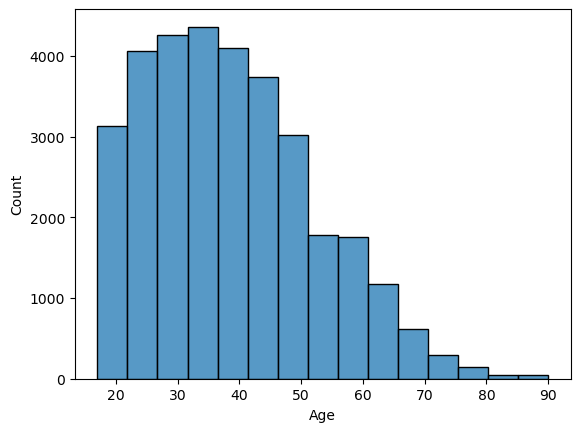

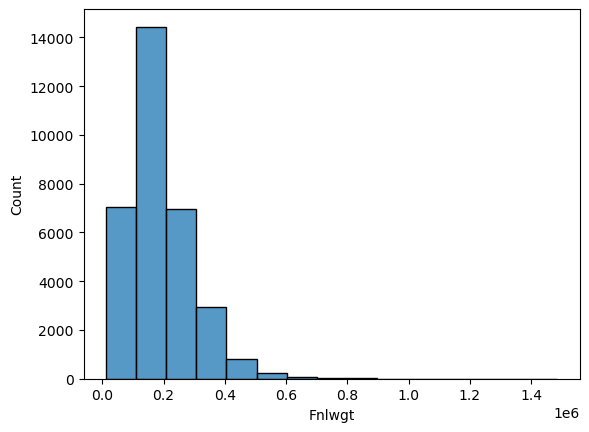

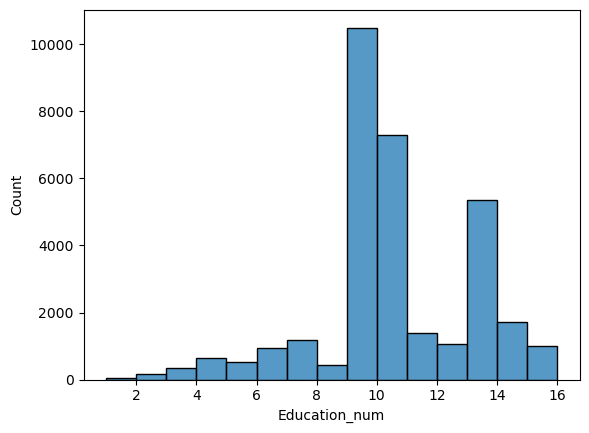

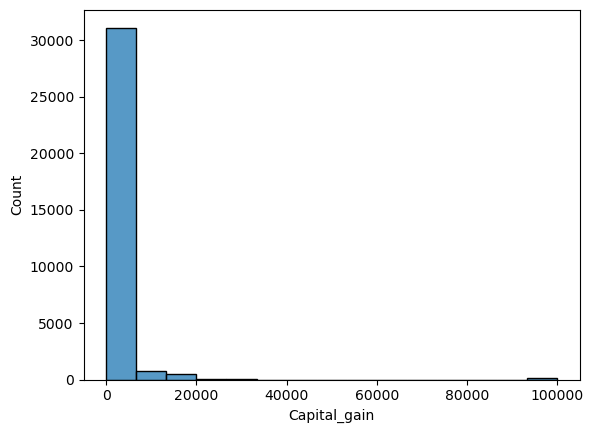

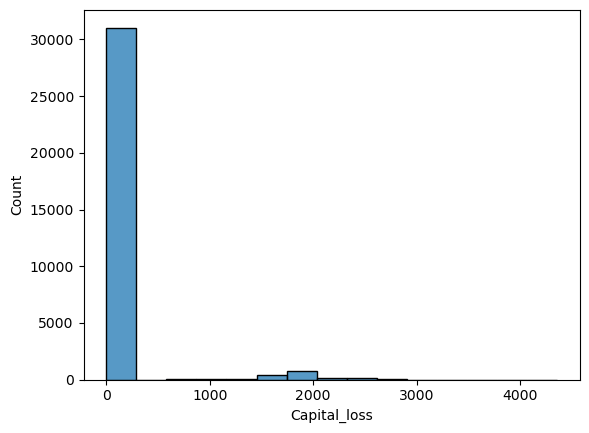

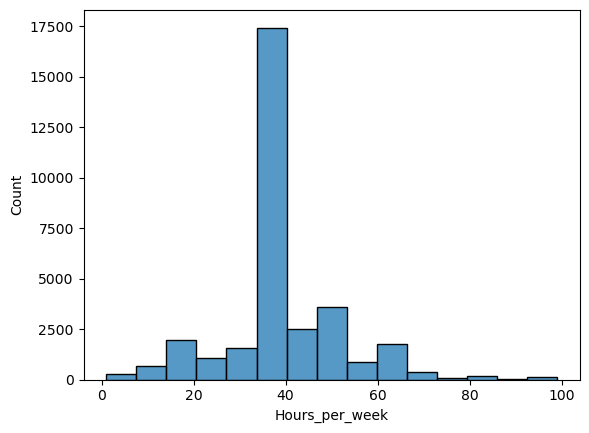

In [18]:
for x in num_columns:
    sns.histplot(df[x],bins=15)
    plt.show()

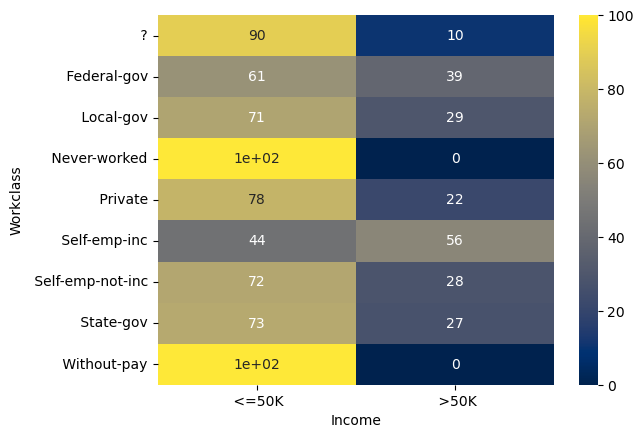

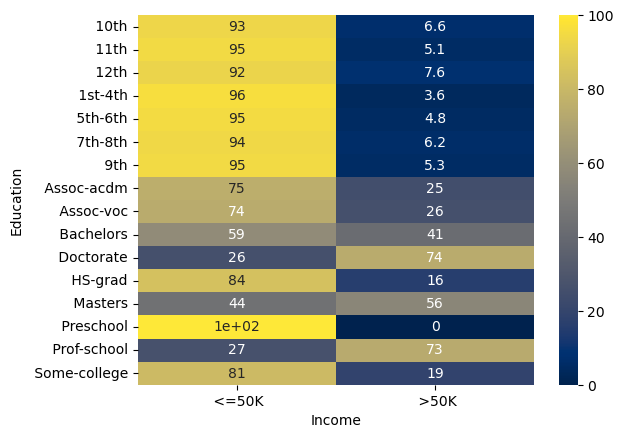

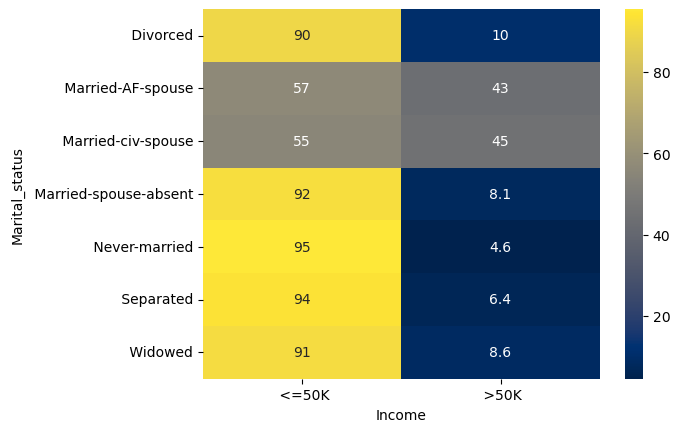

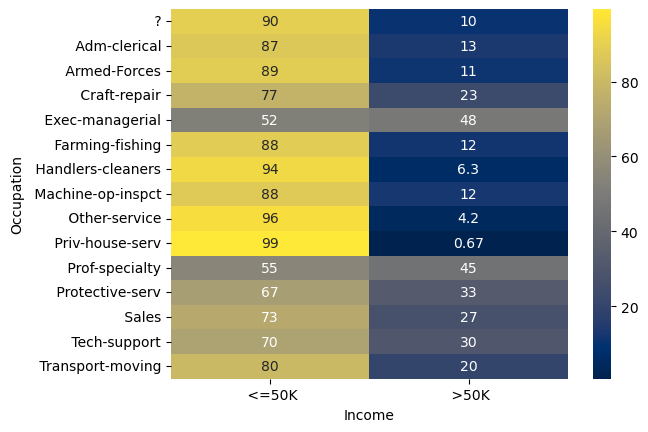

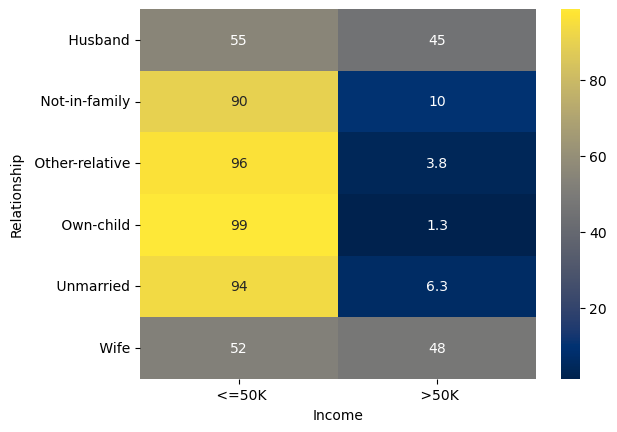

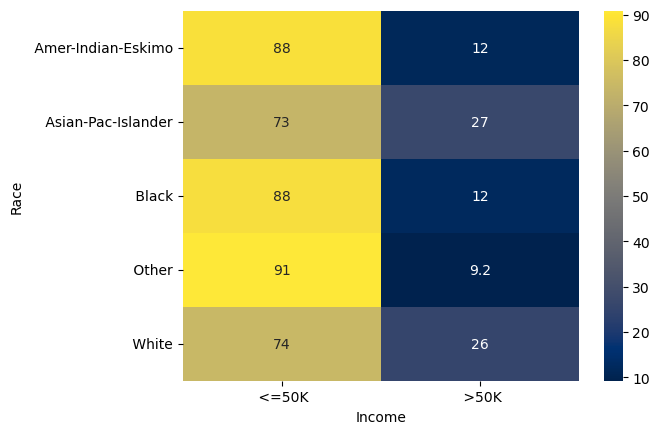

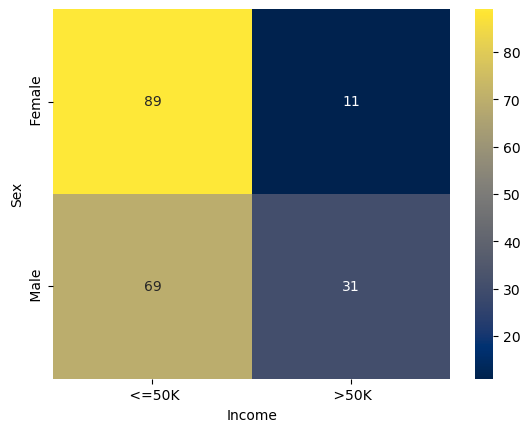

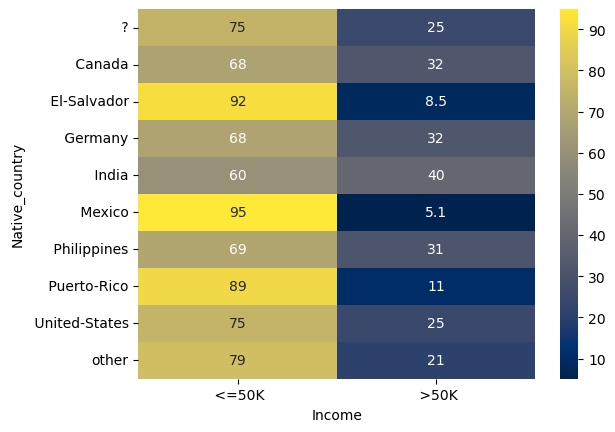

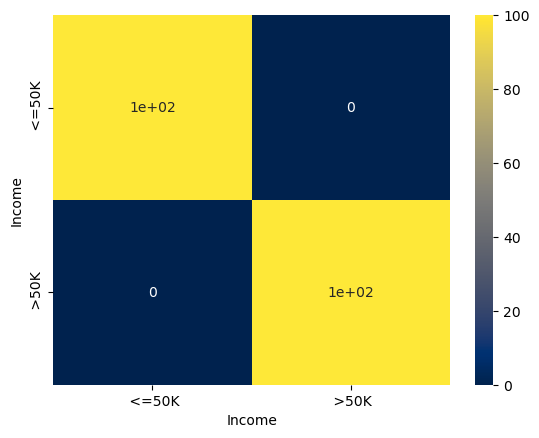

In [19]:
for x in cat_columns:
    crosstab_df = pd.crosstab(df[x], df["Income"],normalize="index")*100
    sns.heatmap(crosstab_df,annot=True,cmap="cividis")
    plt.show()


    findingd
   people working for private companies are very few with high income 
   self employed have teh hifhest percentage of peaple with high income
   education people with a professonall degre or higher education tends to get higher income
    
    

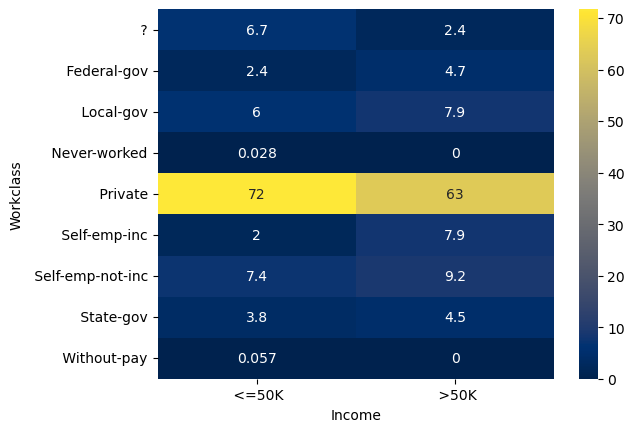

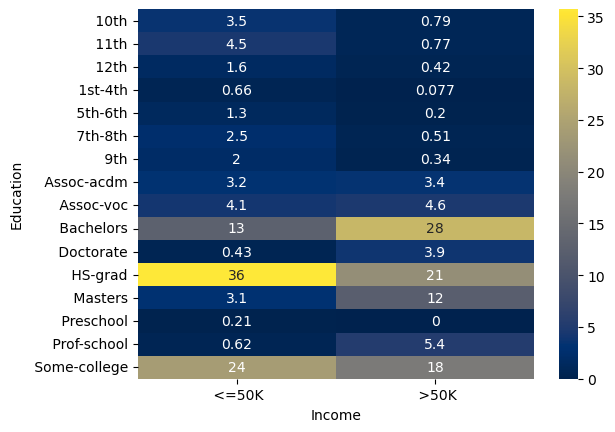

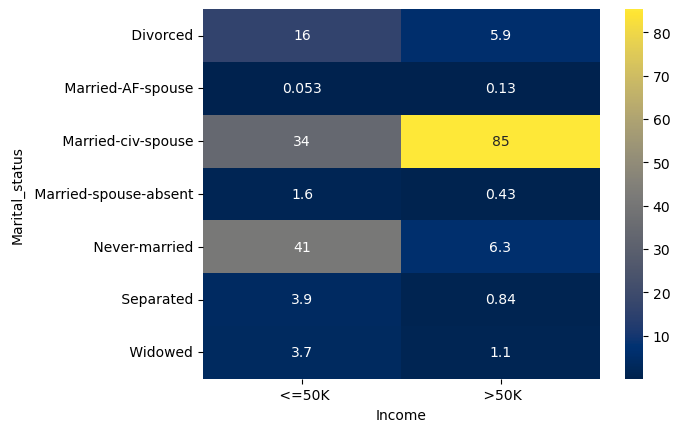

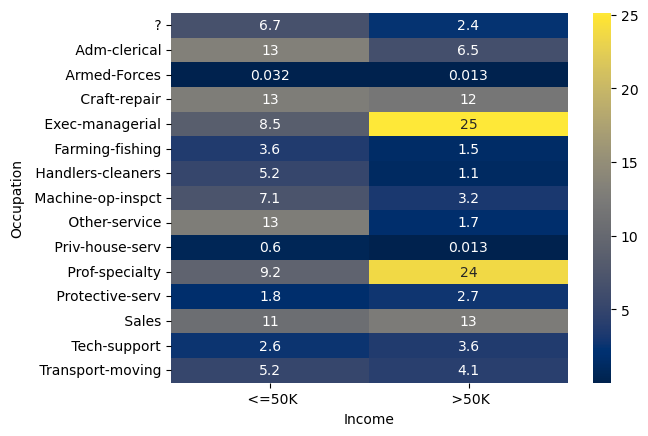

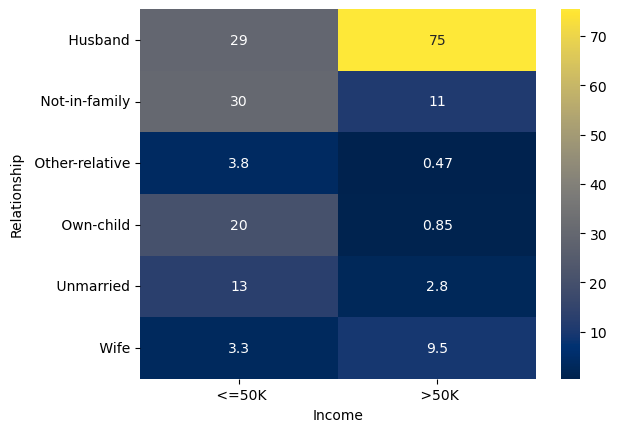

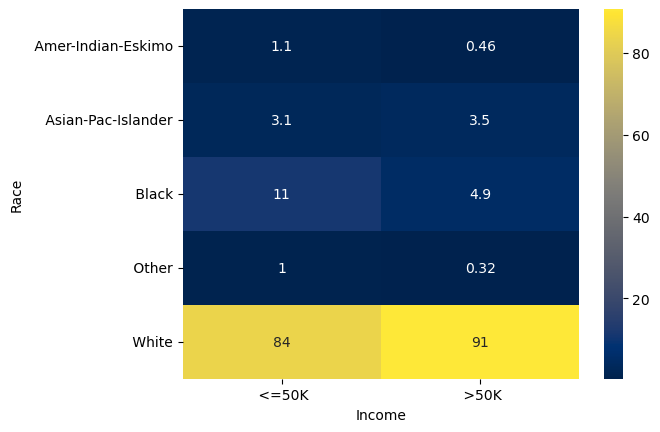

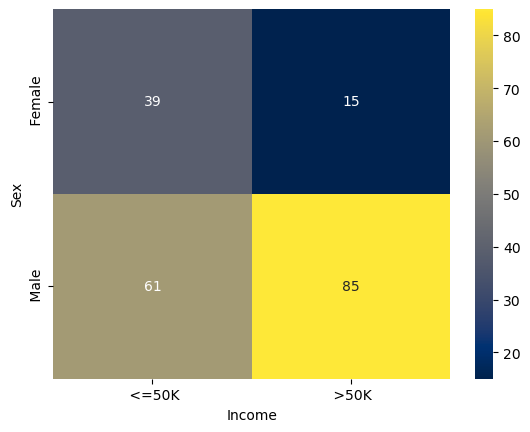

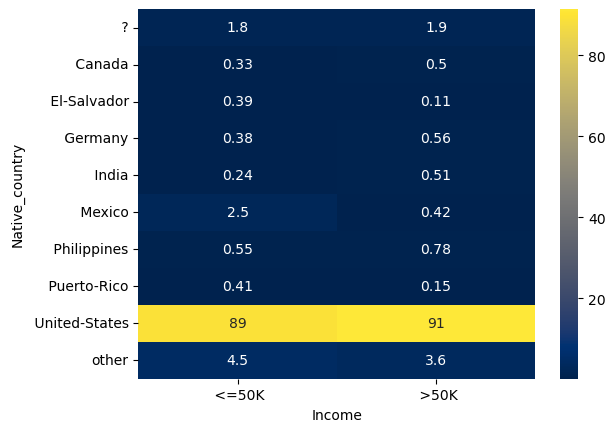

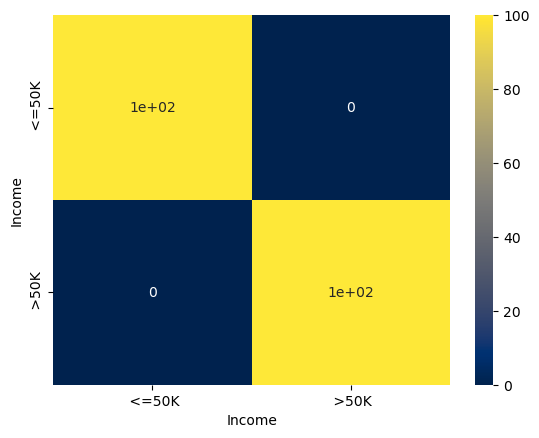

In [20]:
for x in cat_columns:
    crosstab_df = pd.crosstab(df[x], df["Income"],normalize="columns")*100
    sns.heatmap(crosstab_df,annot=True,cmap="cividis")
    plt.show()


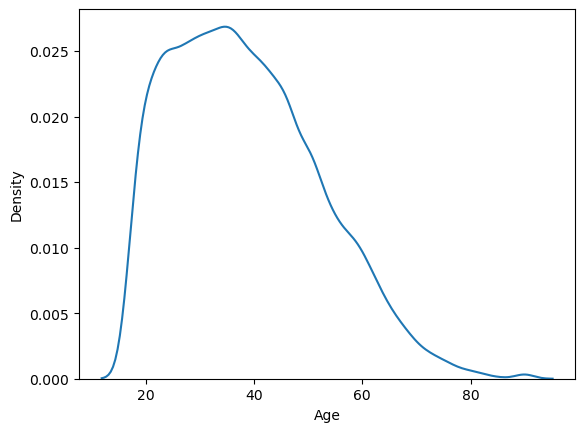

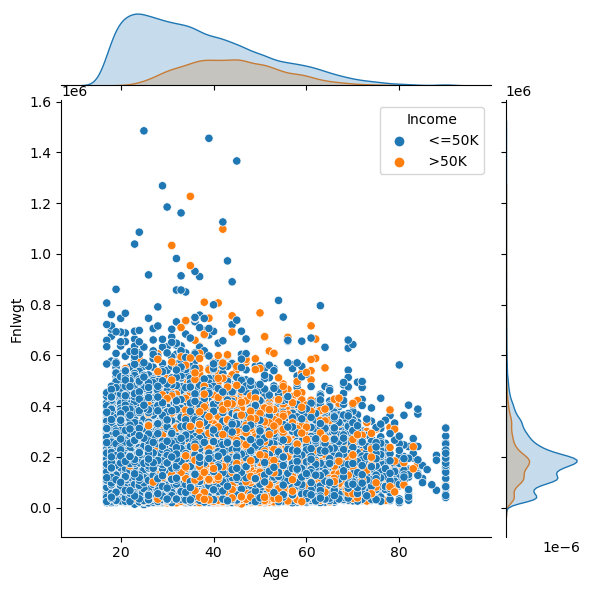

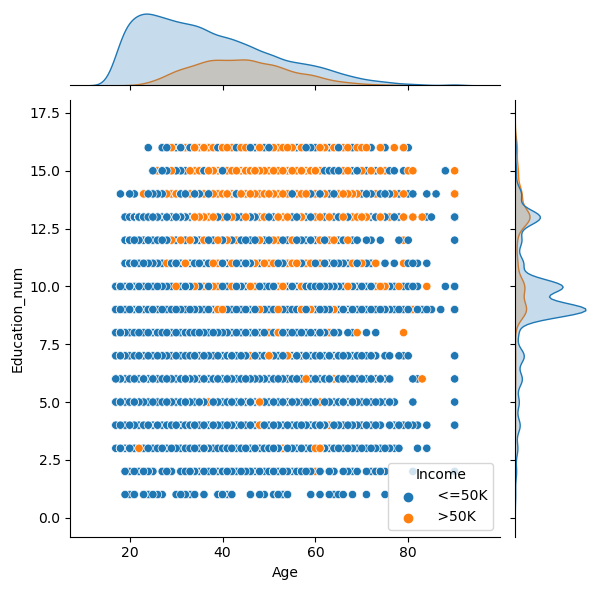

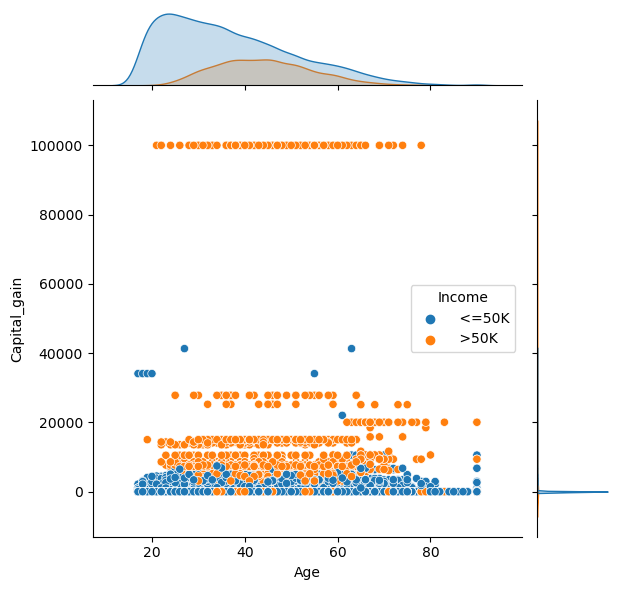

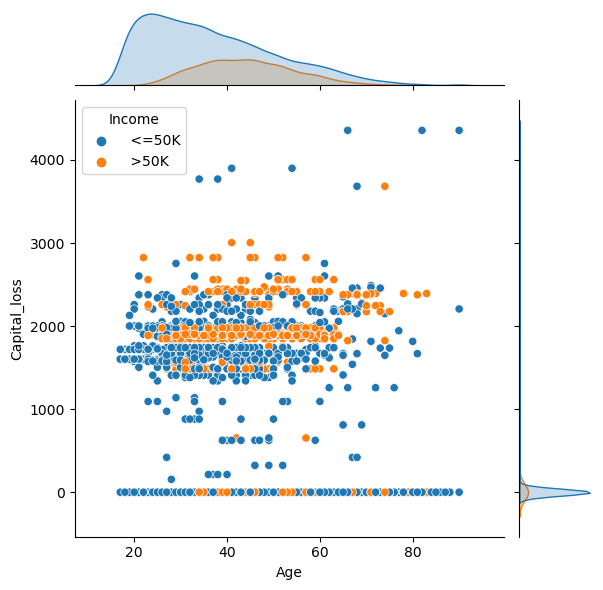

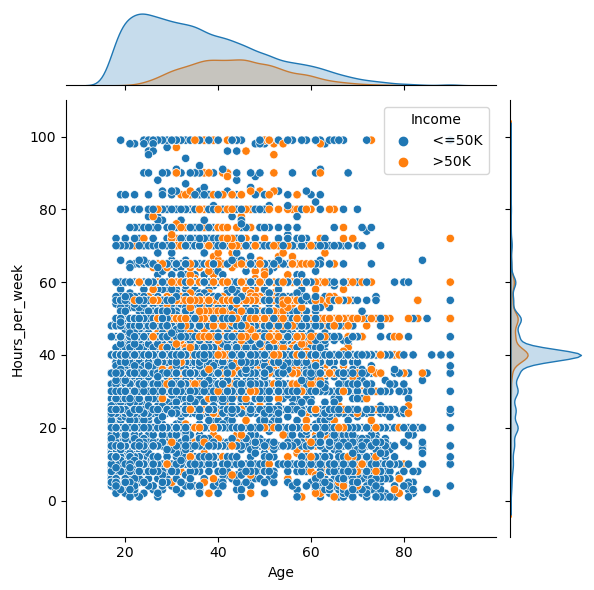

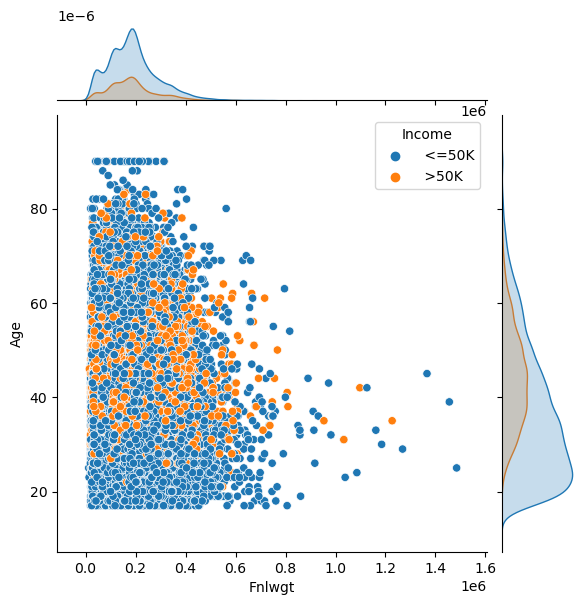

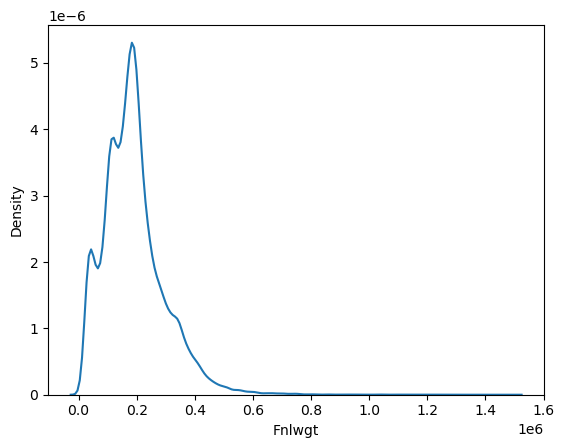

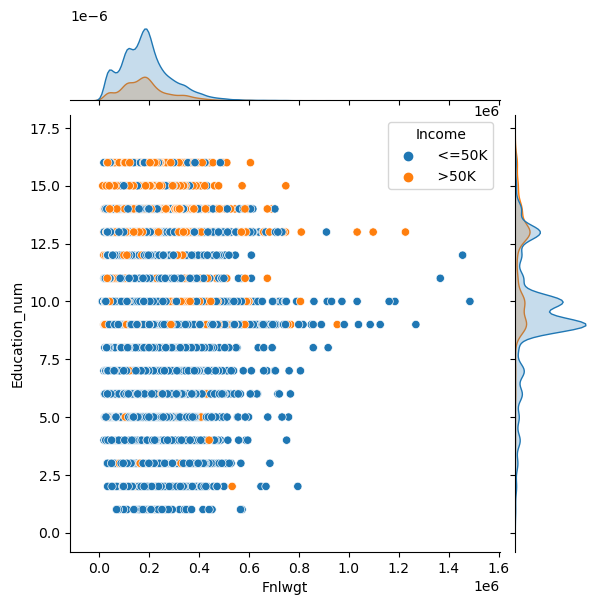

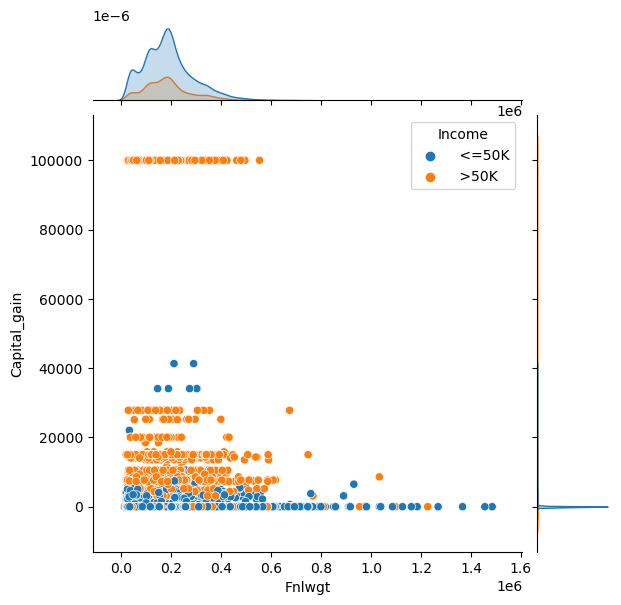

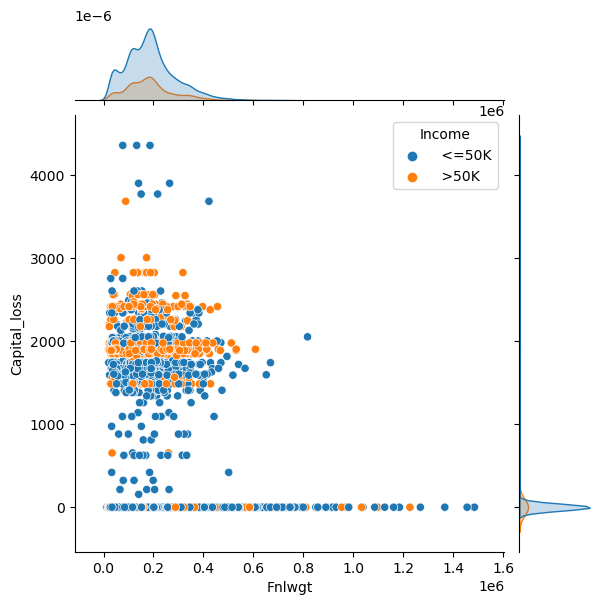

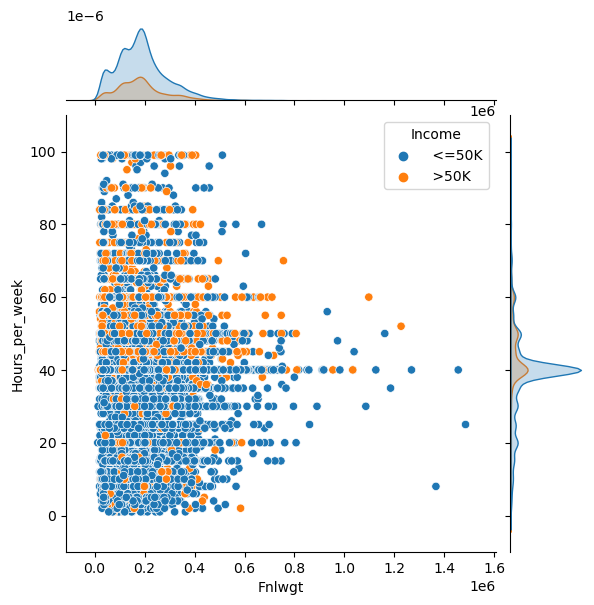

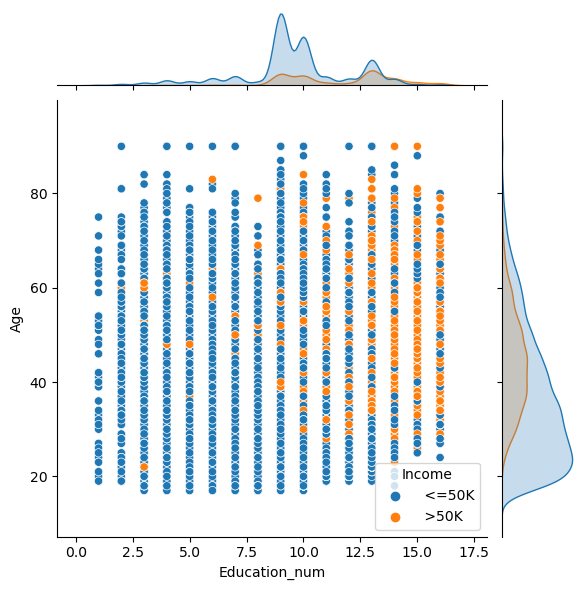

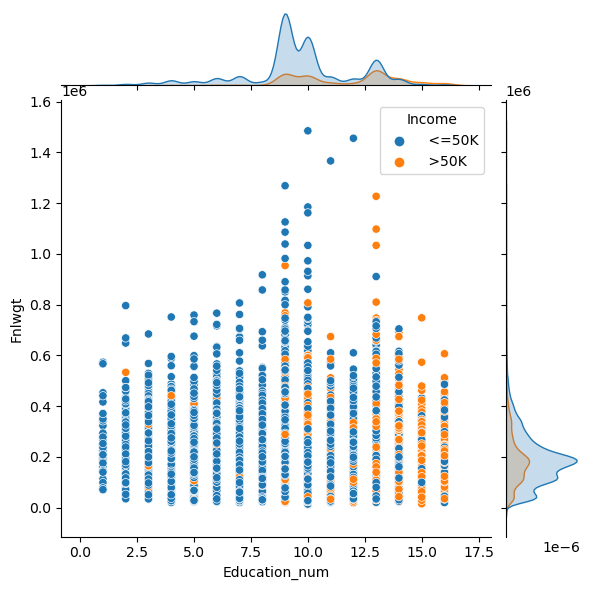

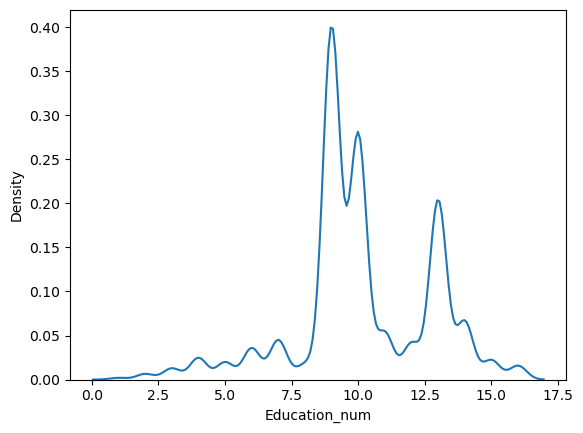

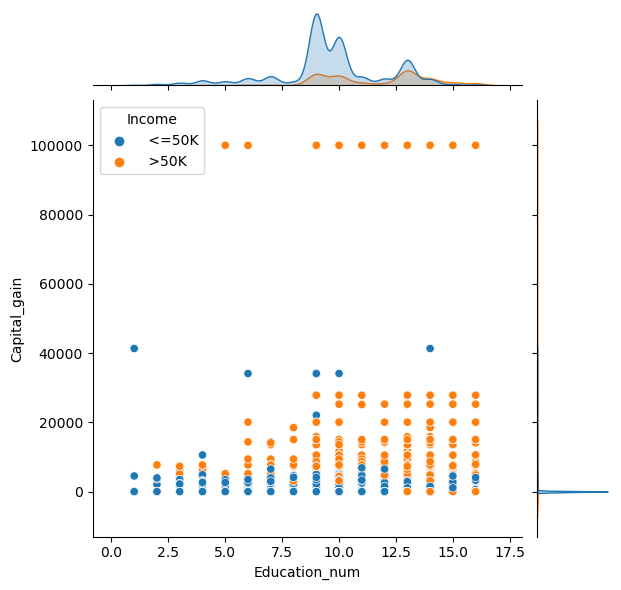

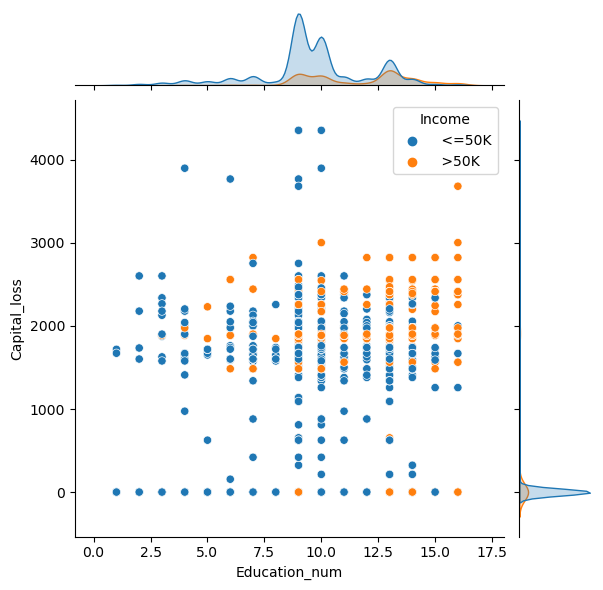

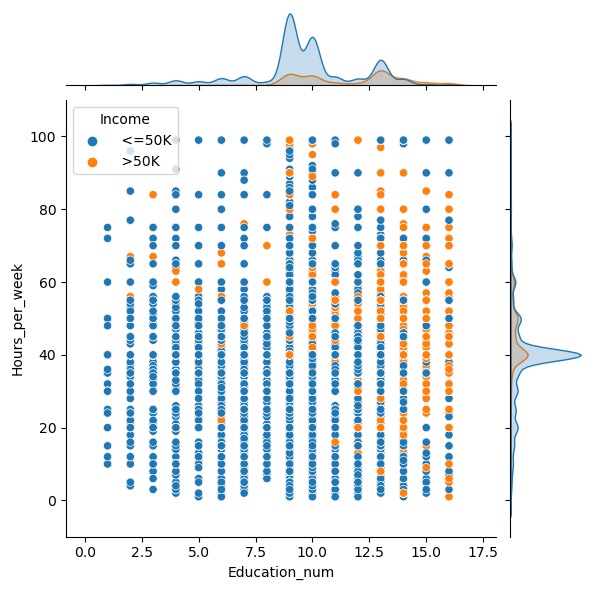

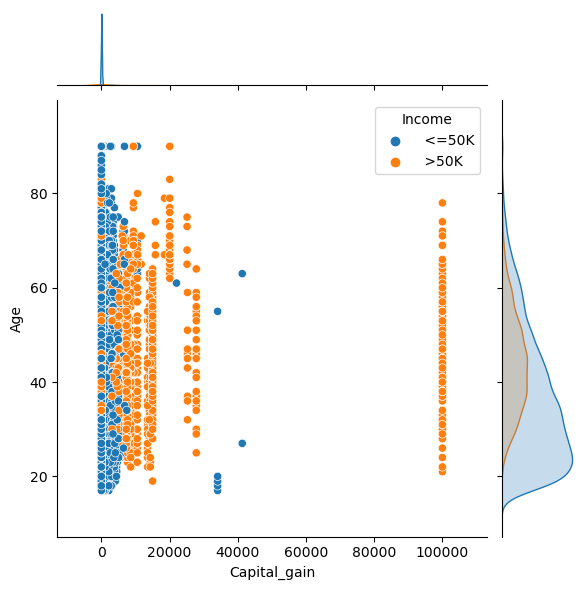

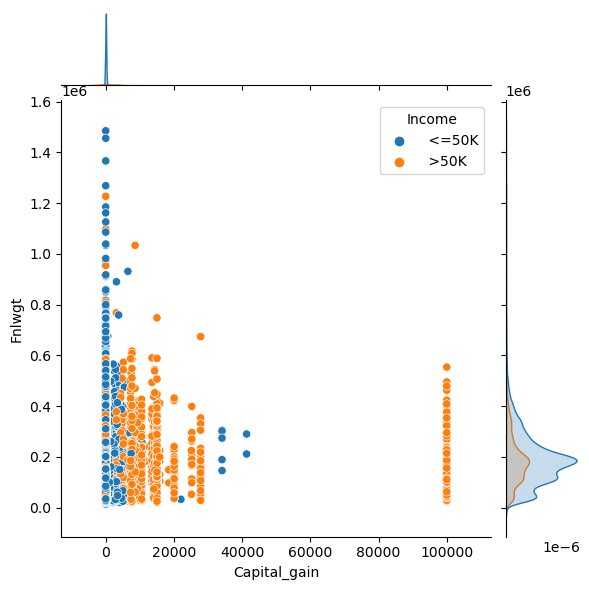

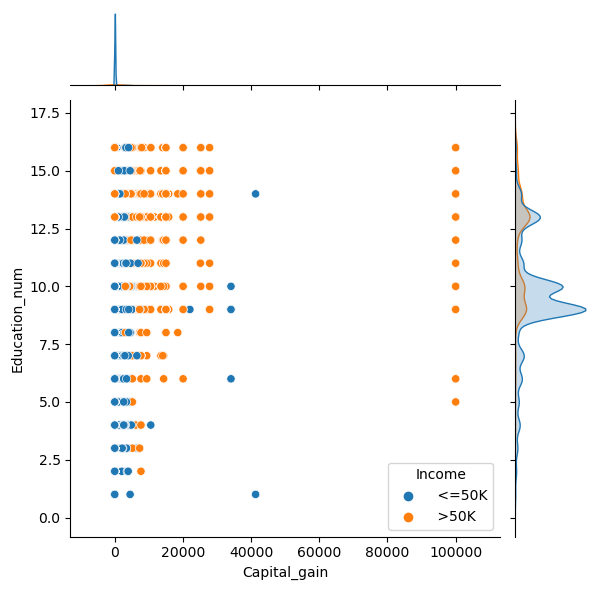

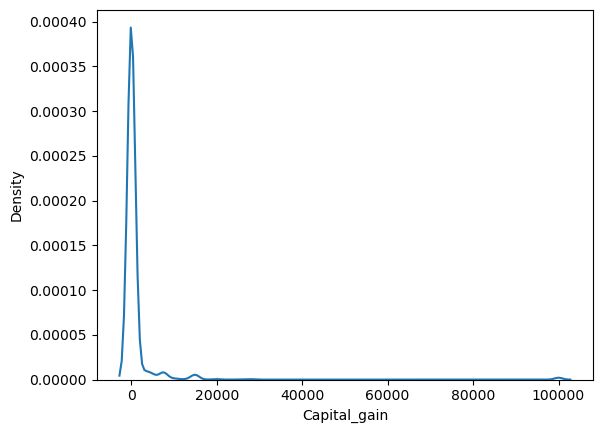

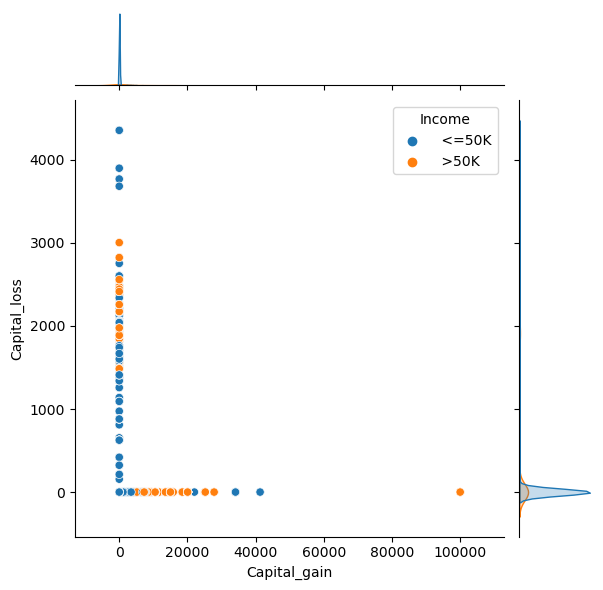

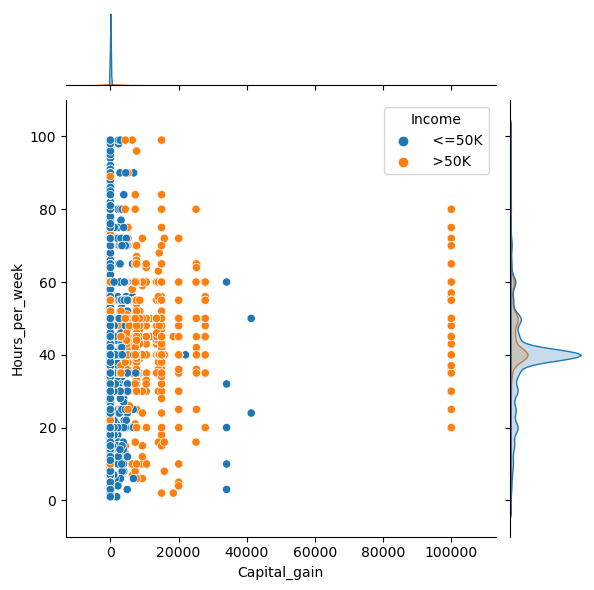

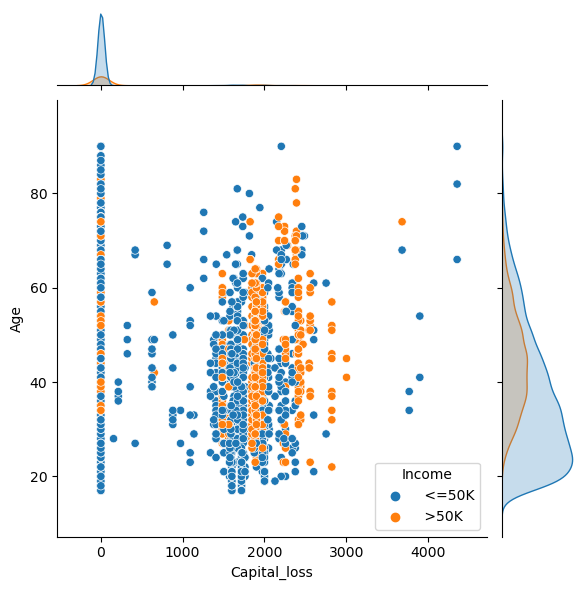

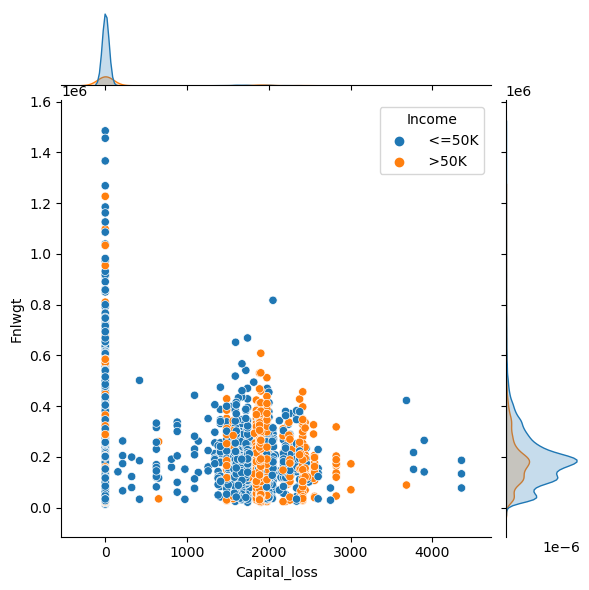

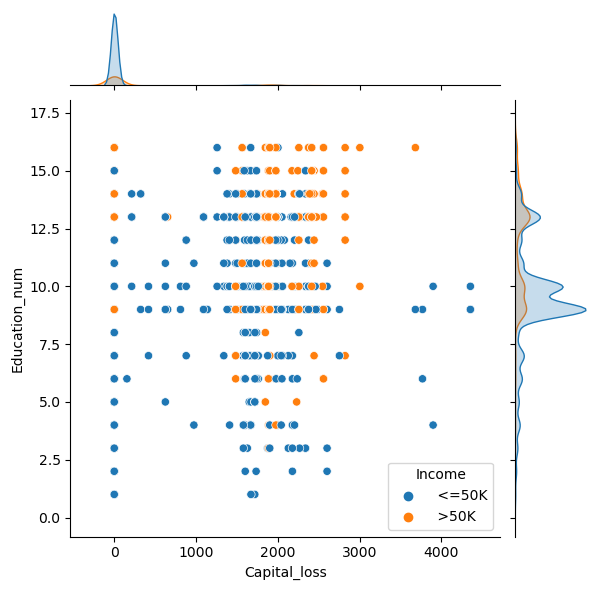

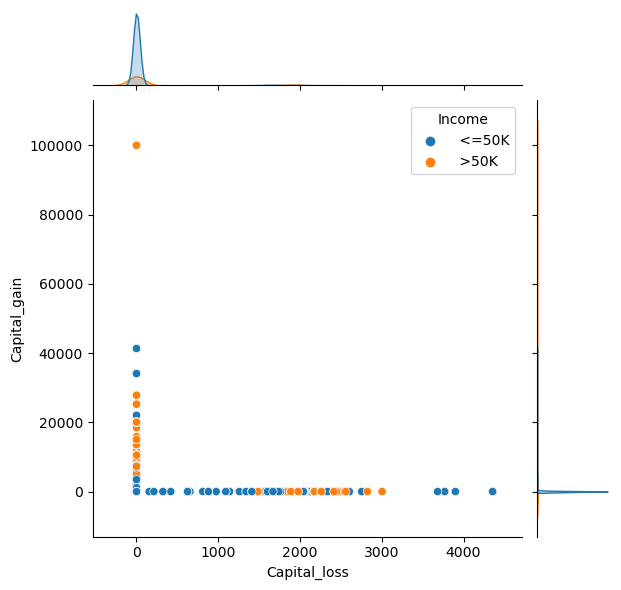

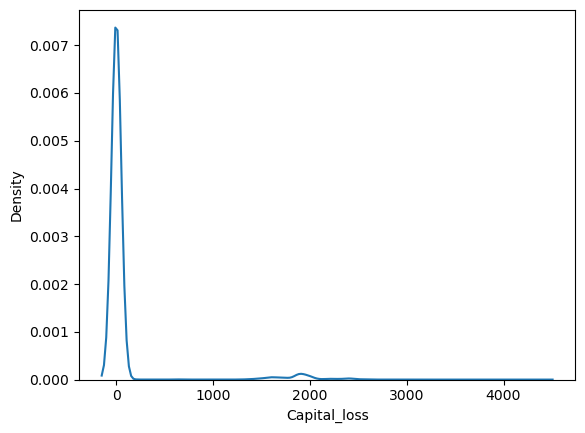

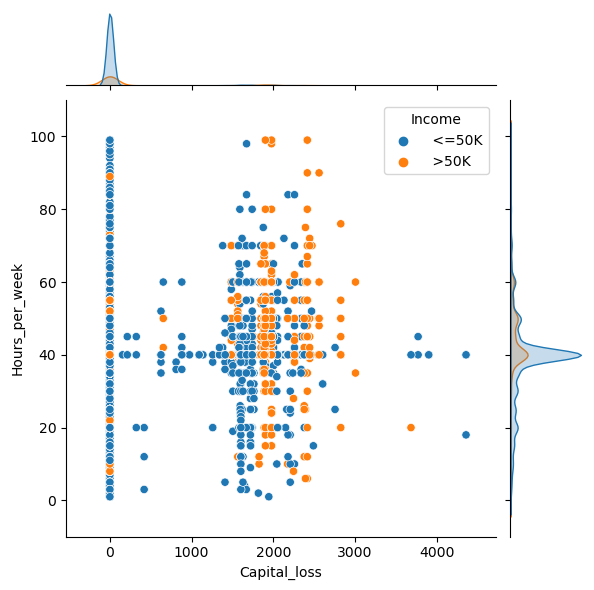

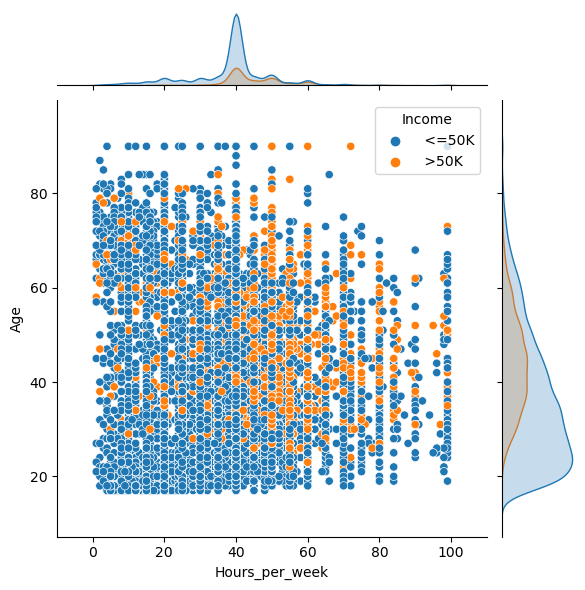

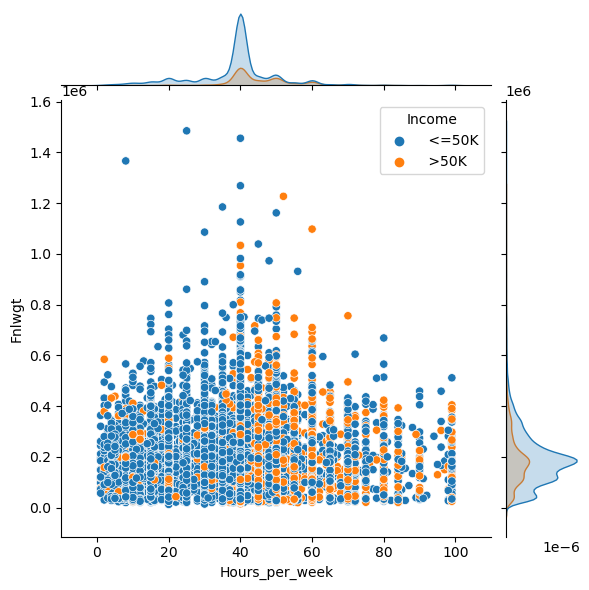

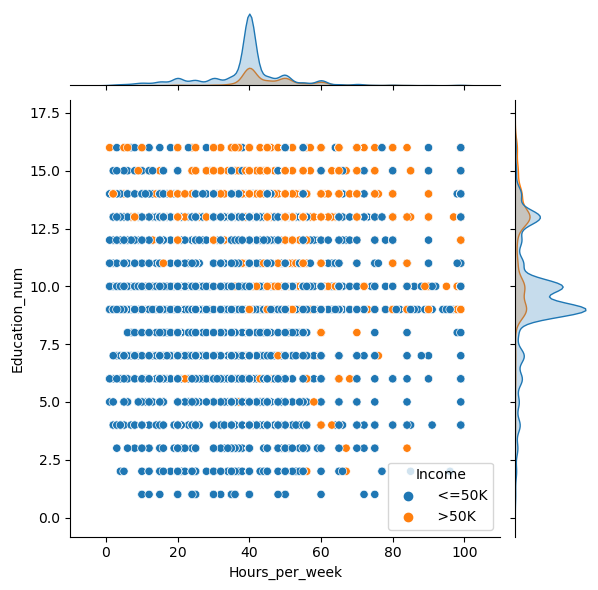

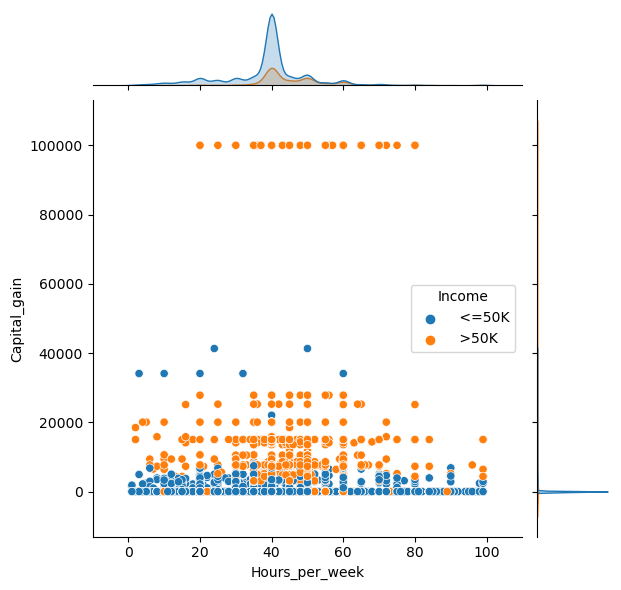

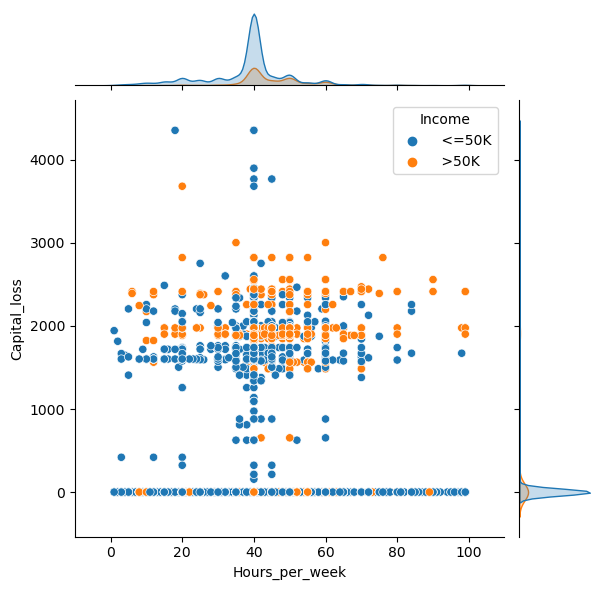

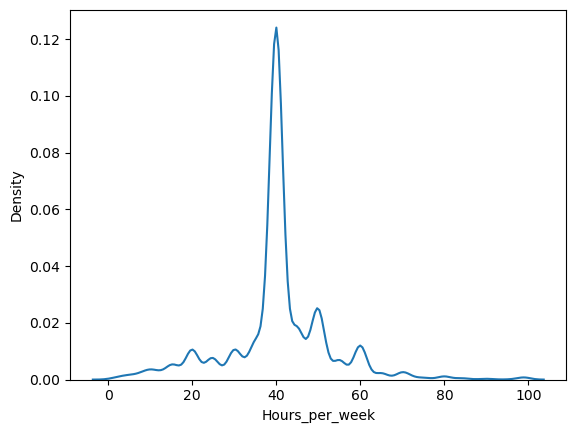

In [21]:
for x in num_columns:
    for y in num_columns:
         if x!=y:
            sns.jointplot(x=x,y=y,kind="scatter",data=df,hue='Income')
            plt.show()
         else:
            sns.kdeplot(df[x])


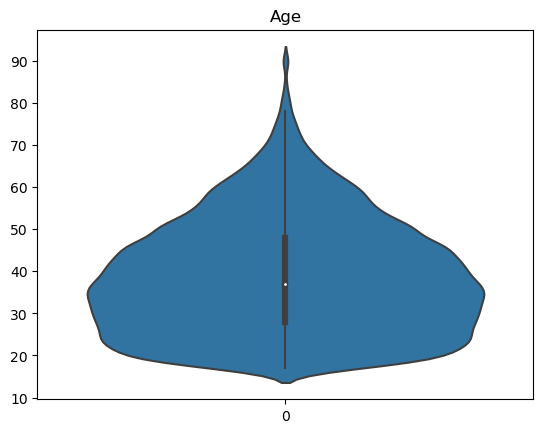

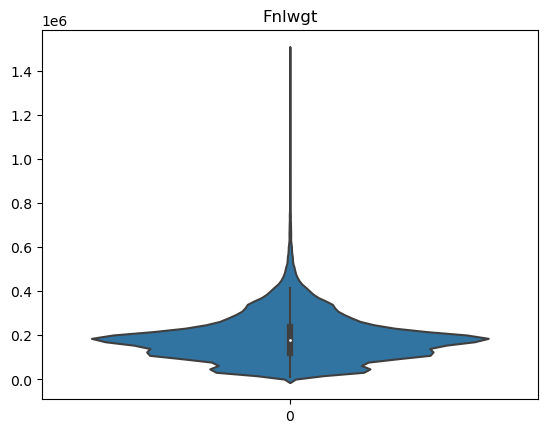

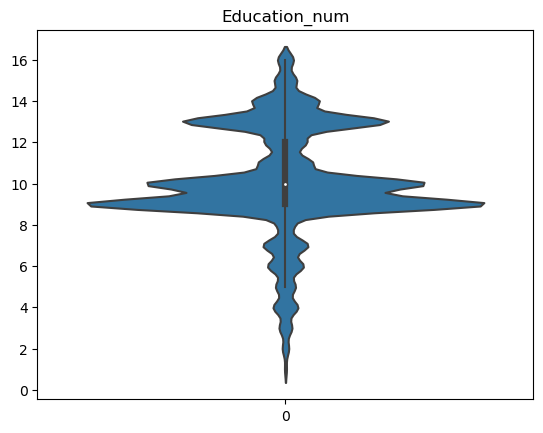

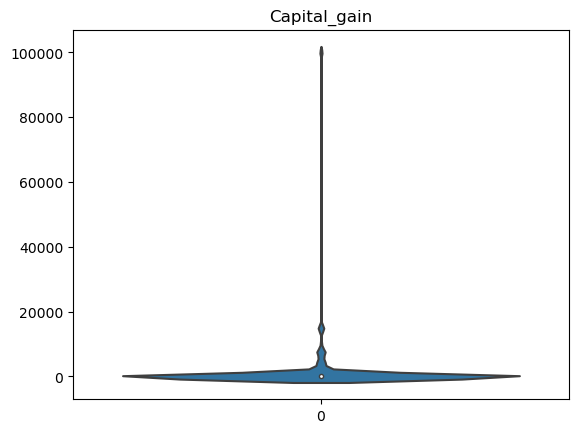

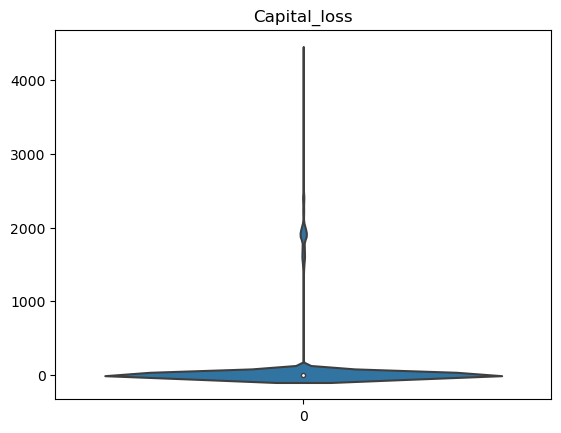

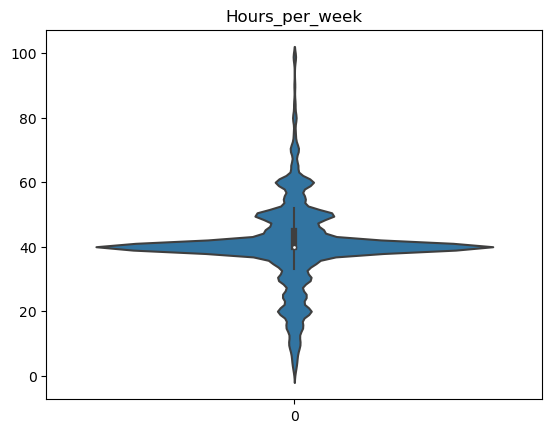

In [22]:
for x in num_columns:
    sns.violinplot(df[x])
    plt.title(x)
    plt.show()

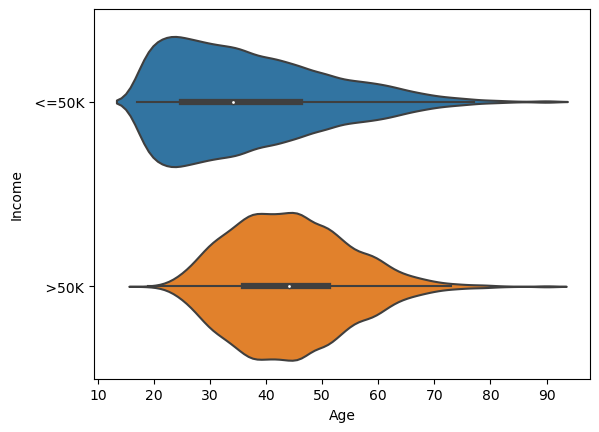

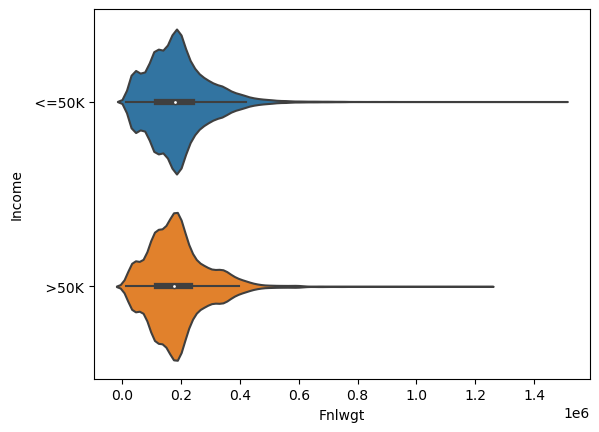

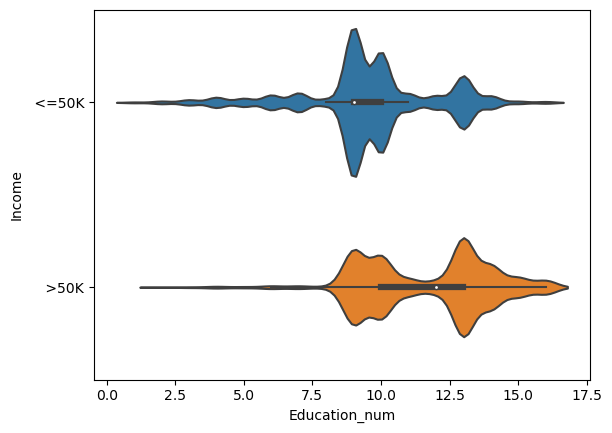

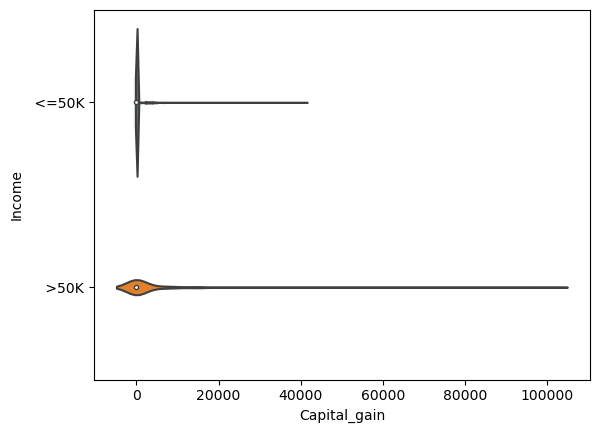

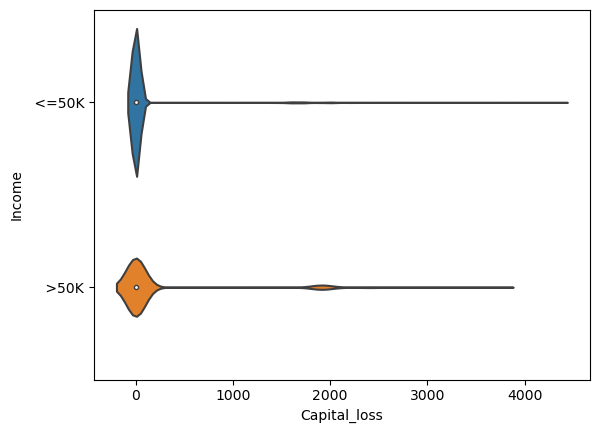

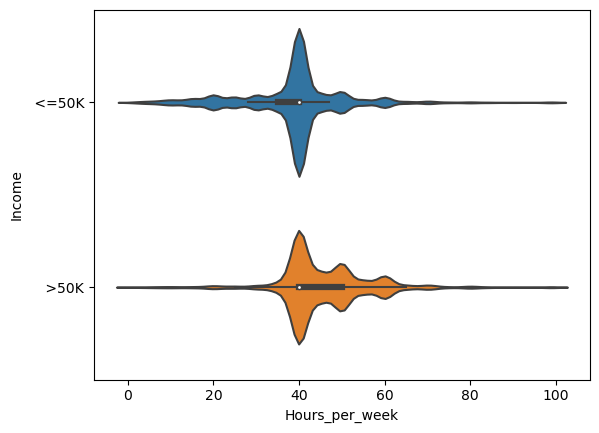

In [23]:
for x in num_columns:
    sns.violinplot(x=x,y="Income",data=df)
    plt.show()

In [24]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [25]:
df["Education_num"].value_counts()

Education_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [26]:
x=df.drop("Income",axis=1)
y=df["Income"]

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [28]:
cat_columns.remove("Income")

In [29]:
preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),num_columns),
                              ('cat',OneHotEncoder(),cat_columns)
                        ])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [30]:
LabelEncoder=LabelEncoder()
y_train_transformed = LabelEncoder.fit_transform(y_train)
y_test_transformed = LabelEncoder.transform(y_test)

In [31]:
y_train_transformed.shape

(26048,)

C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


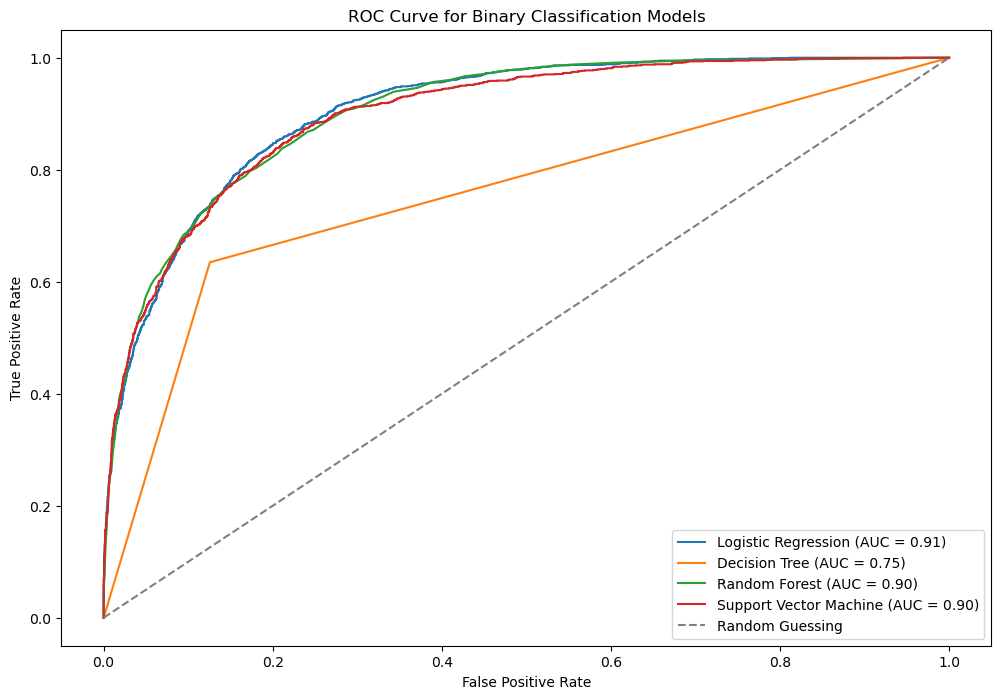


Classification Report and Confusion Matrix for Logistic Regression:



C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4968
           1       0.72      0.62      0.67      1544

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
[[4604  364]
 [ 591  953]]

Accuracy: 0.85

Classification Report and Confusion Matrix for Decision Tree:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4968
           1       0.60      0.64      0.62      1544

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.75      6512
weighted avg       0.82      0.81      0.82      6512

Confusion Matrix:
[[4317  651]
 [ 556  988]]

Accuracy: 0.81

Classification Report and Confusion Matrix for Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.92      0.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from itertools import cycle
from sklearn.metrics import accuracy_score


models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True))
]

plt.figure(figsize=(12, 8))
for name, model in models:
    model.fit(x_train_transformed, y_train_transformed)
    y_prob = model.predict_proba(x_test_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_transformed, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification Models')
plt.legend(loc='lower right')
plt.show()

for name, model in models:
    print(f"\nClassification Report and Confusion Matrix for {name}:\n")
    model.fit(x_train_transformed, y_train_transformed)
    y_pred = model.predict(x_test_transformed)
    print(classification_report(y_test_transformed, y_pred))

    cm = confusion_matrix(y_test_transformed, y_pred)
    print(f"Confusion Matrix:\n{cm}\n")
    accuracy = accuracy_score(y_test_transformed, y_pred)

    print(f'Accuracy: {accuracy:.2f}')


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

base_classifier = DecisionTreeClassifier(max_depth=1)  # Weak learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

adaboost_classifier.fit(x_train_transformed, y_train_transformed)
predictions = adaboost_classifier.predict(x_test_transformed)

print("Accuracy:", accuracy_score(y_test_transformed, predictions))
print("Classification Report:\n", classification_report(y_test_transformed, predictions))


Accuracy: 0.8582616707616708
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4968
           1       0.73      0.63      0.68      1544

    accuracy                           0.86      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



In [34]:
y_test_transformed

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [36]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np


iso_forest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter

num_outliers_dict = {}

# Dictionary to store data without outliers for each column
data_no_outliers_dict = {}

# Iterate over numerical columns
for column in num_columns:
    # Extract the column data
    data = df[column].values.reshape(-1, 1)

    # Fit the Isolation Forest model and predict outliers
    outliers = iso_forest.fit_predict(data)

    # Count the number of outliers
    num_outliers = np.sum(outliers == -1)
    num_outliers_dict[column] = num_outliers

    # Remove outliers from the original data
    data_no_outliers = df.loc[outliers != -1, column]
    data_no_outliers_dict[column] = data_no_outliers

    # Optionally, you can replace the original DataFrame column with the data without outliers
    # df[column] = data_no_outliers

# Print the number of outliers for each column
print("Number of outliers for each column:")
for column, num_outliers in num_outliers_dict.items():
    print(f"{column}: {num_outliers}")

# Print the data without outliers for each column
print("\nData without outliers for each column:")
for column, data_no_outliers in data_no_outliers_dict.items():
    print(f"{column}:\n{data_no_outliers}")


Number of outliers for each column:
Age: 1553
Fnlwgt: 1621
Education_num: 1541
Capital_gain: 1602
Capital_loss: 1519
Hours_per_week: 1552

Data without outliers for each column:
Age:
0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: Age, Length: 31007, dtype: int64
Fnlwgt:
0         83311
1        215646
2        234721
3        338409
4        284582
          ...  
32555    257302
32556    154374
32557    151910
32558    201490
32559    287927
Name: Fnlwgt, Length: 30939, dtype: int64
Education_num:
0        13
1         9
2         7
3        13
4        14
         ..
32555    12
32556     9
32557     9
32558     9
32559     9
Name: Education_num, Length: 31019, dtype: int64
Capital_gain:
0        0
1        0
2        0
3        0
4        0
        ..
32554    0
32555    0
32556    0
32557    0
32558    0
Name: Capital_gain, Length: 30958, dtype: int64
Capital_loss:
0        0
1        0
2    

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40           other   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

<Axes: xlabel='Age', ylabel='Count'>

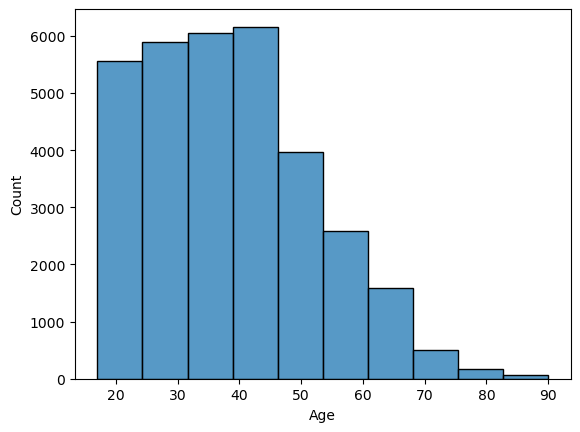

In [39]:
sns.histplot(df["Age"],bins=10)

In [40]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np


df_copy = df.copy()

iso_forest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter

for column in num_columns:
    data = df_copy[column].values.reshape(-1, 1)

    outliers = iso_forest.fit_predict(data)

    df_copy = df_copy.loc[outliers != -1]

print("Number of rows before outlier removal:", len(df))
print("Number of rows after outlier removal:", len(df_copy))


Number of rows before outlier removal: 32560
Number of rows after outlier removal: 24413


In [41]:
x=df_copy.drop("Income",axis=1)
y=df_copy["Income"]

In [ ]:
preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),num_columns),
                              ('cat',OneHotEncoder(),cat_columns)
                        ])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [47]:
from sklearn.preprocessing import LabelEncoder
LabelEncode= LabelEncoder()
y_train_transformed = LabelEncode.fit_transform(y_train)
y_test_transformed = LabelEncode.transform(y_test)

C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


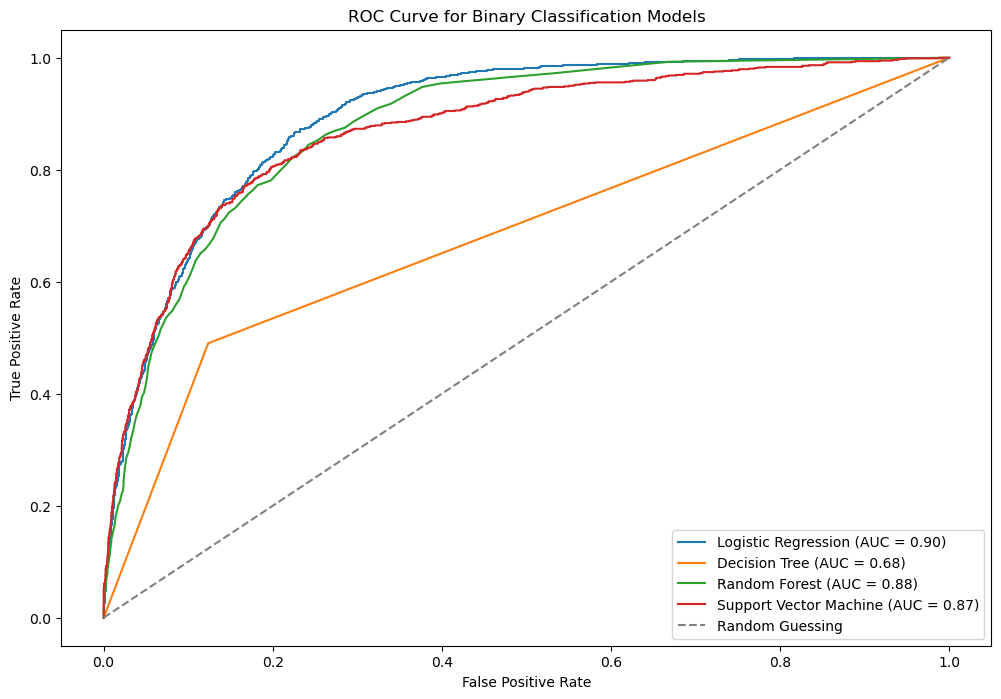


Classification Report and Confusion Matrix for Logistic Regression:



C:\Users\yaris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3906
           1       0.68      0.49      0.57       977

    accuracy                           0.85      4883
   macro avg       0.78      0.72      0.74      4883
weighted avg       0.84      0.85      0.84      4883

Confusion Matrix:
[[3683  223]
 [ 501  476]]

Accuracy: 0.85

Classification Report and Confusion Matrix for Decision Tree:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3906
           1       0.51      0.51      0.51       977

    accuracy                           0.80      4883
   macro avg       0.69      0.69      0.69      4883
weighted avg       0.80      0.80      0.80      4883

Confusion Matrix:
[[3413  493]
 [ 474  503]]

Accuracy: 0.80

Classification Report and Confusion Matrix for Random Forest:

              precision    recall  f1-score   support

           0       0.88      0.94      0.

In [44]:





models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True))
]

plt.figure(figsize=(12, 8))
for name, model in models:
    model.fit(x_train_transformed, y_train_transformed)
    y_prob = model.predict_proba(x_test_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_transformed, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification Models')
plt.legend(loc='lower right')
plt.show()

for name, model in models:
    print(f"\nClassification Report and Confusion Matrix for {name}:\n")
    model.fit(x_train_transformed, y_train_transformed)
    y_pred = model.predict(x_test_transformed)
    print(classification_report(y_test_transformed, y_pred))

    cm = confusion_matrix(y_test_transformed, y_pred)
    print(f"Confusion Matrix:\n{cm}\n")
    accuracy = accuracy_score(y_test_transformed, y_pred)

    print(f'Accuracy: {accuracy:.2f}')


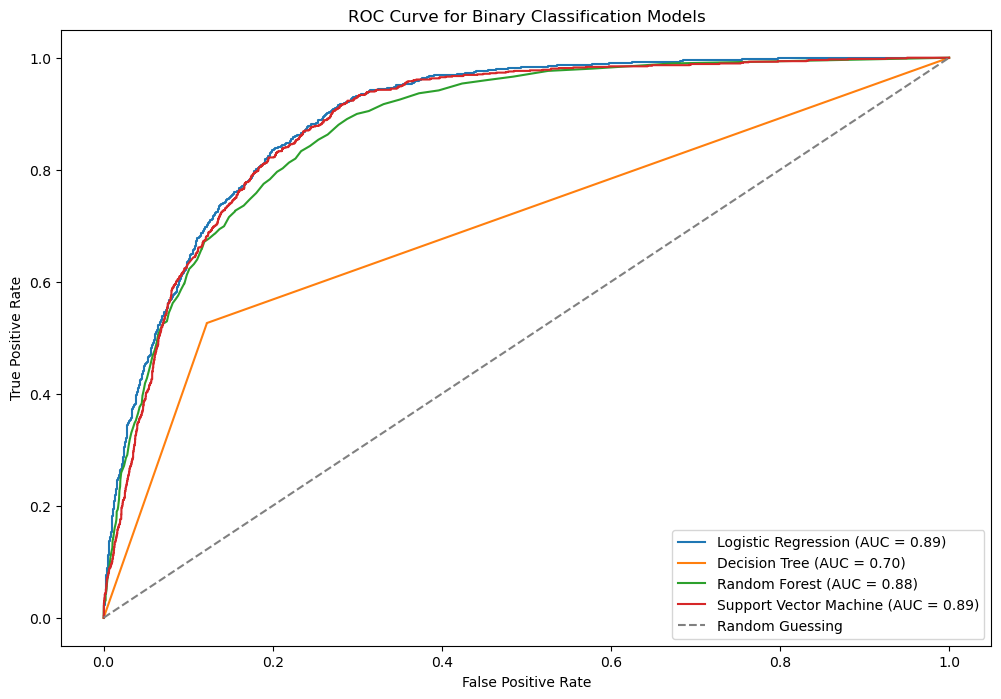


Classification Report and Confusion Matrix for Logistic Regression:

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      3906
           1       0.49      0.86      0.62       977

    accuracy                           0.79      4883
   macro avg       0.72      0.82      0.74      4883
weighted avg       0.86      0.79      0.81      4883

Confusion Matrix:
[[3012  894]
 [ 134  843]]

Accuracy: 0.79

Classification Report and Confusion Matrix for Decision Tree:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3906
           1       0.51      0.51      0.51       977

    accuracy                           0.81      4883
   macro avg       0.70      0.70      0.70      4883
weighted avg       0.81      0.81      0.81      4883

Confusion Matrix:
[[3432  474]
 [ 476  501]]

Accuracy: 0.81

Classification Report and Confusion Matrix for Random Forest:

              precision   

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight

# Assuming your training data is X_train and y_train

# Compute class weights for each class
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_transformed), y=y_train_transformed)

# Create classifiers with adjusted class weights
logistic_model = LogisticRegression(class_weight=dict(zip(np.unique(y_train_transformed), class_weights)), max_iter=1000)
decision_tree_model = DecisionTreeClassifier(class_weight=dict(zip(np.unique(y_train_transformed), class_weights)))
random_forest_model = RandomForestClassifier(class_weight=dict(zip(np.unique(y_train_transformed), class_weights)))
svm_model = SVC(probability=True, class_weight=dict(zip(np.unique(y_train_transformed), class_weights)))

# List of classifiers
models = [
    ('Logistic Regression', logistic_model),
    ('Decision Tree', decision_tree_model),
    ('Random Forest', random_forest_model),
    ('Support Vector Machine', svm_model)
]

plt.figure(figsize=(12, 8))
for name, model in models:
    model.fit(x_train_transformed, y_train_transformed)
    y_prob = model.predict_proba(x_test_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_transformed, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification Models')
plt.legend(loc='lower right')
plt.show()

for name, model in models:
    print(f"\nClassification Report and Confusion Matrix for {name}:\n")
    model.fit(x_train_transformed, y_train_transformed)
    y_pred = model.predict(x_test_transformed)
    print(classification_report(y_test_transformed, y_pred))

    cm = confusion_matrix(y_test_transformed, y_pred)
    print(f"Confusion Matrix:\n{cm}\n")
    accuracy = accuracy_score(y_test_transformed, y_pred)

    print(f'Accuracy: {accuracy:.2f}')


In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Instantiate SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(x_train_transformed, y_train_transformed)

# Train a classifier on the resampled data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(x_test_transformed)

# Evaluate the classifier
print(classification_report(y_test_transformed, y_pred))
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f'Accuracy: {accuracy:.2f}')


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3906
           1       0.60      0.60      0.60       977

    accuracy                           0.84      4883
   macro avg       0.75      0.75      0.75      4883
weighted avg       0.84      0.84      0.84      4883

Accuracy: 0.84


In [57]:
target=["Income"]

In [61]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessing=ColumnTransformer(
transformers=[('num',StandardScaler(),num_columns),
             ('cat',OneHotEncoder(),cat_columns)
            ])
classifier=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

random_forest_pipeline=Pipeline(steps=[('prepro',preprocessing),
                                       ("classifier",classifier)])


random_forest_pipeline.fit(X_train, y_train)
y_pred_rf = random_forest_pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.8474298586934261


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
scores=cross_val_score(classifier,x_train_transformed, y_train_transformed,cv=5,scoring='accuracy')
print("Cross-Validation Scores:",scores )
print("Mean CV Accuracy:", scores.mean())
print("Standard Deviation of CV Accuracy:", scores.std())

Cross-Validation Scores: [0.84459805 0.83845366 0.84152586 0.84383001 0.84075781]
Mean CV Accuracy: 0.8418330773169483
Standard Deviation of CV Accuracy: 0.0022047158363144846


In [65]:
from sklearn.ensemble import AdaBoostClassifier
adaclassifier=AdaBoostClassifier()
scores=cross_val_score(adaclassifier,x_train_transformed, y_train_transformed,cv=5,scoring='accuracy')
print("Cross-Validation Scores:",scores )
print("Mean CV Accuracy:", scores.mean())
print("Standard Deviation of CV Accuracy:", scores.std())

Cross-Validation Scores: [0.85509473 0.8499744  0.85202253 0.85867896 0.85611879]
Mean CV Accuracy: 0.8543778801843318
Standard Deviation of CV Accuracy: 0.0030653619144077296


In [74]:
from sklearn.model_selection import GridSearchCV
adaboost_classifier=AdaBoostClassifier()
adaboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('adaboost', adaboost_classifier)
], memory="cache_folder")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_transformed, y_train_transformed)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8565284178187405


In [75]:
adaboot_classifier=AdaBoostClassifier(learning_rate = 0.5, n_estimators = 200)
adaboot_classifier.fit(x_train_transformed, y_train_transformed)
y_pred = adaboot_classifier.predict(x_test_transformed)
print(classification_report(y_test_transformed, y_pred))
accuracy = accuracy_score(y_test_transformed, y_pred)
print(f'Accuracy: {accuracy:.2f}')



              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3906
           1       0.70      0.50      0.59       977

    accuracy                           0.86      4883
   macro avg       0.79      0.72      0.75      4883
weighted avg       0.85      0.86      0.85      4883

Accuracy: 0.86
